# 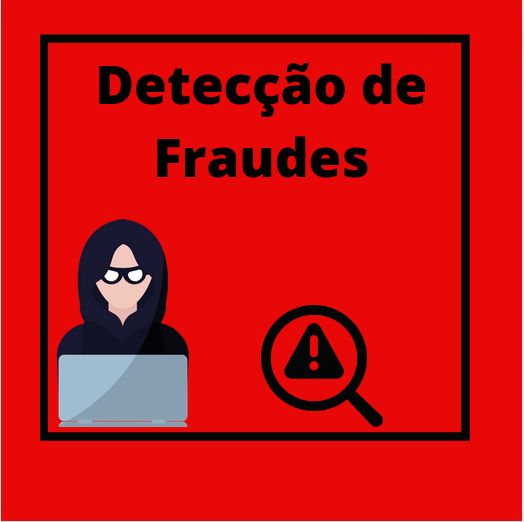

In [127]:
pwd

'/home/henrique'

# Solictação da empresa: 
#### Realizar um modelo capaz de prever fraudes.

In [ ]:
pip install markupsafe==2.0.1 #instalei versão que não dá problema

In [2]:
pip install dtreeviz

     |████████████████████████████████| 61 kB 241 kB/s eta 0:00:011
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67327 sha256=f65c41d03e4636aaf0c47277bdacac12f94398735e688bd4b0bb8005a9824830
  Stored in directory: /home/henrique/.cache/pip/wheels/60/89/05/020fd84deed2402d74d5f97a98c22233156582e19ecf34058f
Successfully built dtreeviz
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas_profiling as pf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
import graphviz
from dtreeviz.trees import dtreeviz

%matplotlib inline


### 1.0 Preparação do Arquivo

In [34]:
df = pd.read_csv('Transferências/fraud_dataset_example.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [36]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [38]:
df_ = df[['isFraud','isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]

In [39]:
 df_

isFraud  isFlaggedFraud  step      type      amount     nameOrig  \
0             0               0     1   PAYMENT     9839.64  C1231006815   
1             0               0     1   PAYMENT     1864.28  C1666544295   
2             1               0     1  TRANSFER      181.00  C1305486145   
3             1               0     1  CASH_OUT      181.00   C840083671   
4             0               0     1   PAYMENT    11668.14  C2048537720   
...         ...             ...   ...       ...         ...          ...   
101608        0               0    10   PAYMENT     7477.02   C513257306   
101609        0               0    10  CASH_OUT   282252.35   C210473293   
101610        0               0    10   PAYMENT    17289.01   C807582280   
101611        0               0    10  TRANSFER  1347146.45  C1315779140   
101612        0               0    10  CASH_OUT   469539.21   C515691325   

        oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  \
0           170136.00       160296.36  M1979787155            0.00   
1            21249.00        19384.72  M2044282225            0.00   
2              181.00            0.00   C553264065            0.00   
3              181.00            0.00    C38997010        21182.00   
4            41554.00        29885.86  M1230701703            0.00   
...               ...             ...          ...             ...   
101608         785.00            0.00   M524833426            0.00   
101609      220339.29            0.00  C1172042998        95156.01   
101610           0.00            0.00   M334249577            0.00   
101611        1605.00            0.00  C1631408038       541639.43   
101612       31133.00            0.00  C1383702768            0.00   

        newbalanceDest  
0                 0.00  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
...                ...  
101608            0.00  
101609        91286.97  
101610            0.00  
101611      2186953.43  
101612       469539.21  

[101613 rows x 11 columns]

In [40]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'sinal_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

In [41]:
df = df.rename(columns = colunas)
df.head()

tempo      tipo     valor     cliente1  saldo_inicial_c1  novo_saldo_c1  \
0      1   PAYMENT   9839.64  C1231006815          170136.0      160296.36   
1      1   PAYMENT   1864.28  C1666544295           21249.0       19384.72   
2      1  TRANSFER    181.00  C1305486145             181.0           0.00   
3      1  CASH_OUT    181.00   C840083671             181.0           0.00   
4      1   PAYMENT  11668.14  C2048537720           41554.0       29885.86   

      cliente2  saldo_inicial_c2  novo_saldo_c2  fraude  sinal_fraude  
0  M1979787155               0.0            0.0       0             0  
1  M2044282225               0.0            0.0       0             0  
2   C553264065               0.0            0.0       1             0  
3    C38997010           21182.0            0.0       1             0  
4  M1230701703               0.0            0.0       0             0

In [42]:
df.describe()

tempo         valor  saldo_inicial_c1  novo_saldo_c1  \
count  101613.000000  1.016130e+05      1.016130e+05   1.016130e+05   
mean        8.523457  1.740901e+05      9.071753e+05   9.234992e+05   
std         1.820681  3.450199e+05      2.829575e+06   2.867319e+06   
min         1.000000  3.200000e-01      0.000000e+00   0.000000e+00   
25%         8.000000  1.001659e+04      0.000000e+00   0.000000e+00   
50%         9.000000  5.338541e+04      2.019047e+04   0.000000e+00   
75%        10.000000  2.124984e+05      1.947150e+05   2.192178e+05   
max        10.000000  1.000000e+07      3.893942e+07   3.894623e+07   

       saldo_inicial_c2  novo_saldo_c2         fraude  sinal_fraude  
count      1.016130e+05   1.016130e+05  101613.000000      101613.0  
mean       8.810428e+05   1.183998e+06       0.001142           0.0  
std        2.399949e+06   2.797761e+06       0.033768           0.0  
min        0.000000e+00   0.000000e+00       0.000000           0.0  
25%        0.000000e+00   0.000000e+00       0.000000           0.0  
50%        2.105800e+04   5.178343e+04       0.000000           0.0  
75%        5.919217e+05   1.063122e+06       0.000000           0.0  
max        3.400874e+07   3.894623e+07       1.000000           0.0

In [43]:
df.describe().T

count          mean           std   min       25%  \
tempo             101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
valor             101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
saldo_inicial_c1  101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
novo_saldo_c1     101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
saldo_inicial_c2  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
novo_saldo_c2     101613.0  1.183998e+06  2.797761e+06  0.00      0.00   
fraude            101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
sinal_fraude      101613.0  0.000000e+00  0.000000e+00  0.00      0.00   

                       50%         75%          max  
tempo                 9.00       10.00        10.00  
valor             53385.41   212498.40  10000000.00  
saldo_inicial_c1  20190.47   194715.00  38939424.03  
novo_saldo_c1         0.00   219217.76  38946233.02  
saldo_inicial_c2  21058.00   591921.70  34008736.98  
novo_saldo_c2     51783.43  1063121.64  38946233.02  
fraude                0.00        0.00         1.00  
sinal_fraude          0.00        0.00         0.00

In [44]:
df.shape

(101613, 11)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tempo             101613 non-null  int64  
 1   tipo              101613 non-null  object 
 2   valor             101613 non-null  float64
 3   cliente1          101613 non-null  object 
 4   saldo_inicial_c1  101613 non-null  float64
 5   novo_saldo_c1     101613 non-null  float64
 6   cliente2          101613 non-null  object 
 7   saldo_inicial_c2  101613 non-null  float64
 8   novo_saldo_c2     101613 non-null  float64
 9   fraude            101613 non-null  int64  
 10  sinal_fraude      101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [46]:
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [47]:
df.isnull().values.any()

False

### Descrição das variáveis com pandas Profiling

In [48]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
df = pd.get_dummies(data=df,columns=['tipo'])
df

tempo       valor     cliente1  saldo_inicial_c1  novo_saldo_c1  \
0           1     9839.64  C1231006815         170136.00      160296.36   
1           1     1864.28  C1666544295          21249.00       19384.72   
2           1      181.00  C1305486145            181.00           0.00   
3           1      181.00   C840083671            181.00           0.00   
4           1    11668.14  C2048537720          41554.00       29885.86   
...       ...         ...          ...               ...            ...   
101608     10     7477.02   C513257306            785.00           0.00   
101609     10   282252.35   C210473293         220339.29           0.00   
101610     10    17289.01   C807582280              0.00           0.00   
101611     10  1347146.45  C1315779140           1605.00           0.00   
101612     10   469539.21   C515691325          31133.00           0.00   

           cliente2  saldo_inicial_c2  novo_saldo_c2  fraude  sinal_fraude  \
0       M1979787155              0.00           0.00       0             0   
1       M2044282225              0.00           0.00       0             0   
2        C553264065              0.00           0.00       1             0   
3         C38997010          21182.00           0.00       1             0   
4       M1230701703              0.00           0.00       0             0   
...             ...               ...            ...     ...           ...   
101608   M524833426              0.00           0.00       0             0   
101609  C1172042998          95156.01       91286.97       0             0   
101610   M334249577              0.00           0.00       0             0   
101611  C1631408038         541639.43     2186953.43       0             0   
101612  C1383702768              0.00      469539.21       0             0   

        tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0                  0              0           0             1              0  
1                  0              0           0             1              0  
2                  0              0           0             0              1  
3                  0              1           0             0              0  
4                  0              0           0             1              0  
...              ...            ...         ...           ...            ...  
101608             0              0           0             1              0  
101609             0              1           0             0              0  
101610             0              0           0             1              0  
101611             0              0           0             0              1  
101612             0              1           0             0              0  

[101613 rows x 15 columns]

In [50]:
df = df.drop(['cliente1','cliente2','sinal_fraude'], axis = 1)

In [51]:
df.columns

Index(['tempo', 'valor', 'saldo_inicial_c1', 'novo_saldo_c1',
       'saldo_inicial_c2', 'novo_saldo_c2', 'fraude', 'tipo_CASH_IN',
       'tipo_CASH_OUT', 'tipo_DEBIT', 'tipo_PAYMENT', 'tipo_TRANSFER'],
      dtype='object')

### 2 - Regressão Logística

In [52]:
x = df.drop('fraude', axis = 1)
y = df['fraude']

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [54]:
lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))



Acurácia: 0.9989765391276965
Precisão: 0.2
Recall: 0.043478260869565216
F1: 0.07142857142857142


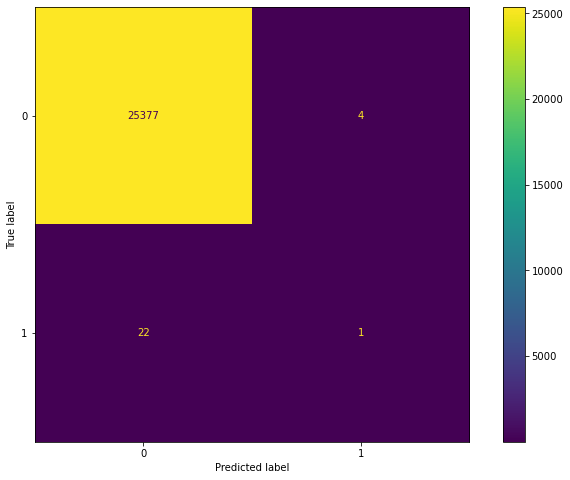

In [55]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

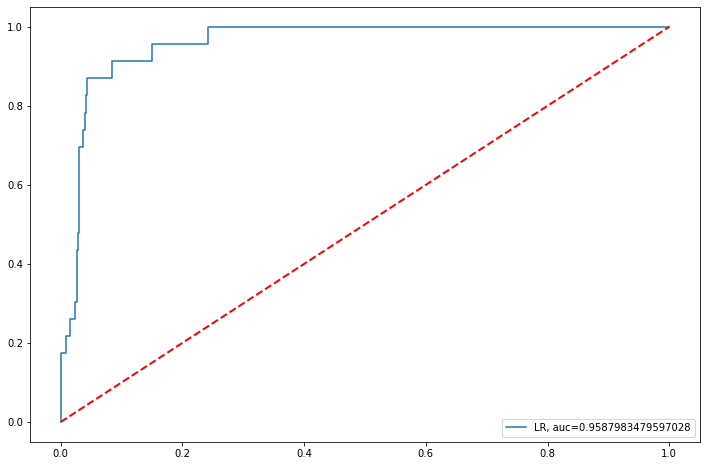

In [56]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

### Balanceamento de Dados

In [58]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [59]:
from imblearn.over_sampling import SMOTE 
import numpy as np

SEED=42

smote = SMOTE(random_state=42)

In [60]:
#Separar em grupos

In [61]:
x = df.drop('fraude', axis=1)
y = df['fraude']                     

In [62]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [63]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

fraude  tempo          valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000             0              0   
1               0.000000       0.000000             0              0   
2               0.000000       0.000000             0              0   
3           21182.000000       0.000000             0              1   
4               0.000000       0.000000             0              0   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000             0              0   
202990          0.000000       0.000000             0              0   
202991       1945.589357    9370.603471             0              0   
202992          0.000000       0.000000             0              0   
202993          0.000000       0.000000             0              0   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              1  
202990           0             0              1  
202991           0             0              0  
202992           0             0              1  
202993           0             0              1  

[202994 rows x 12 columns]

In [64]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

In [65]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [66]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


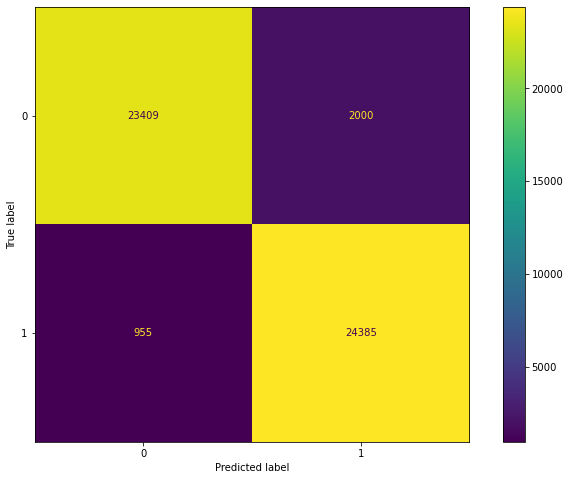

In [68]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

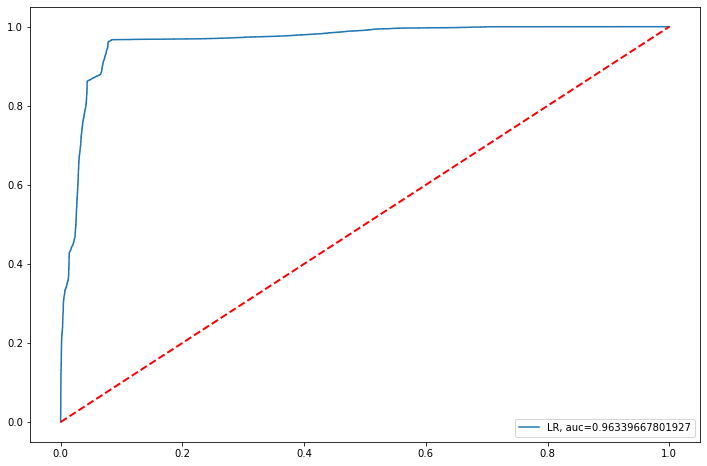

In [69]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [70]:
pf.ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###  3.0 - Decision Tree

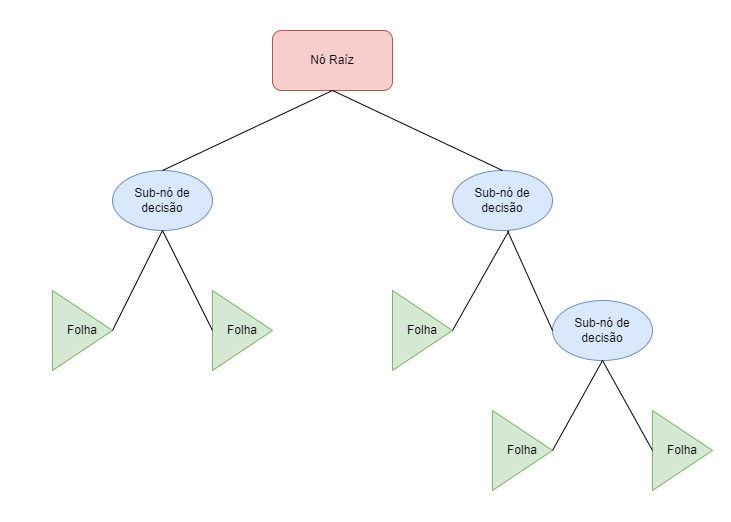

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [91]:
dt =  DecisionTreeClassifier(max_depth = 5, random_state=SEED)

In [92]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943


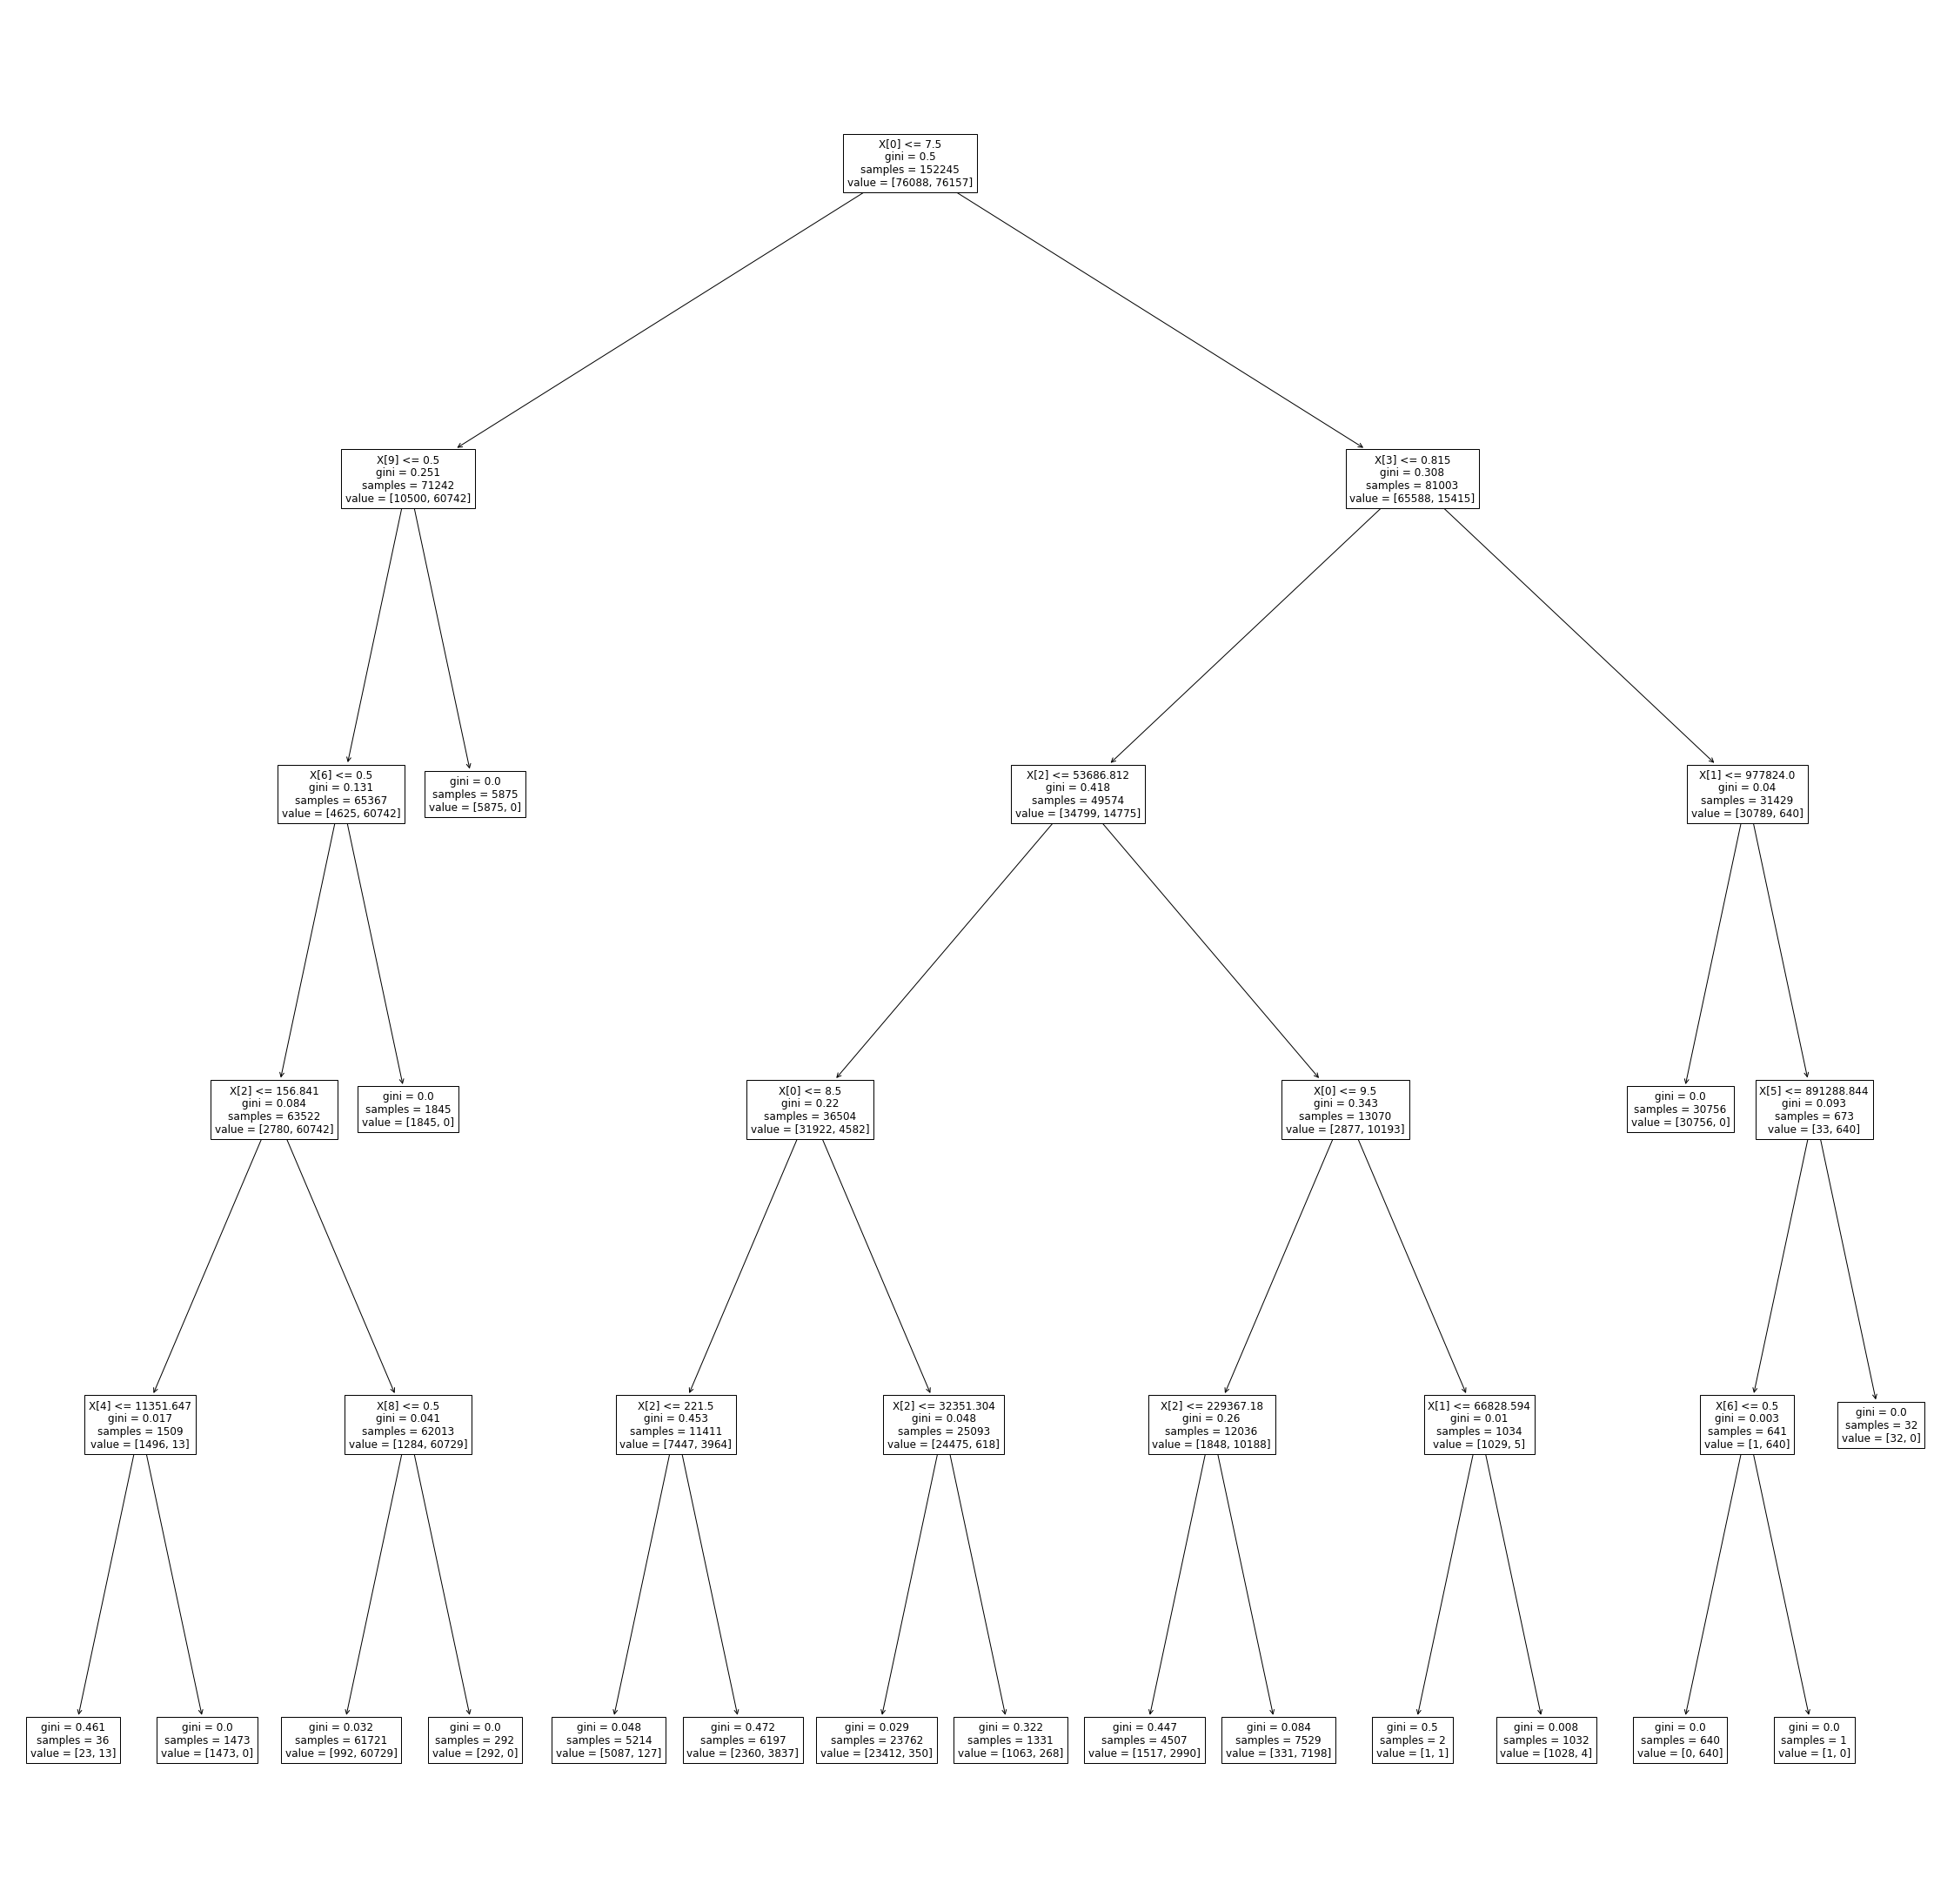

In [100]:
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(dt)

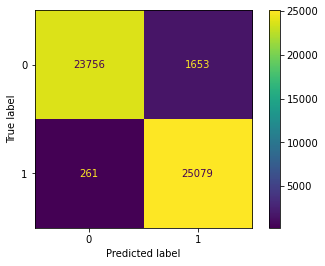

In [79]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

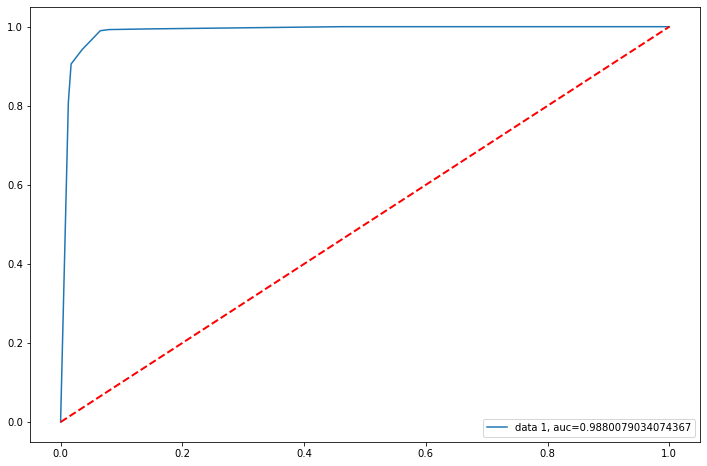

In [80]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

### 4.0 Random Forest

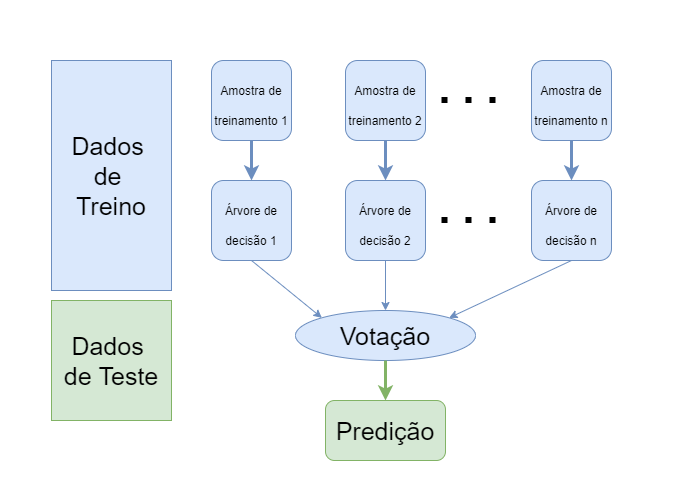

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [88]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


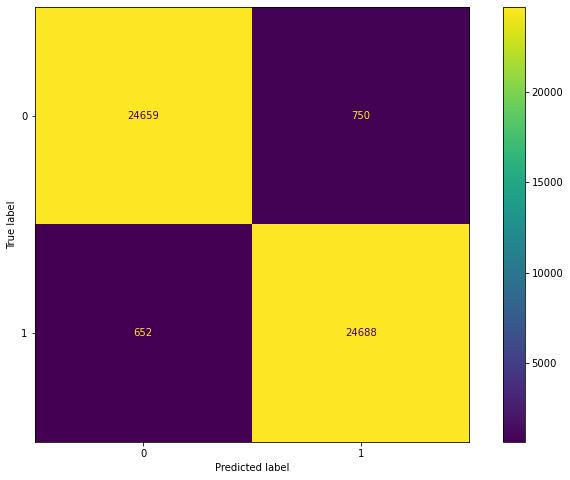

In [89]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

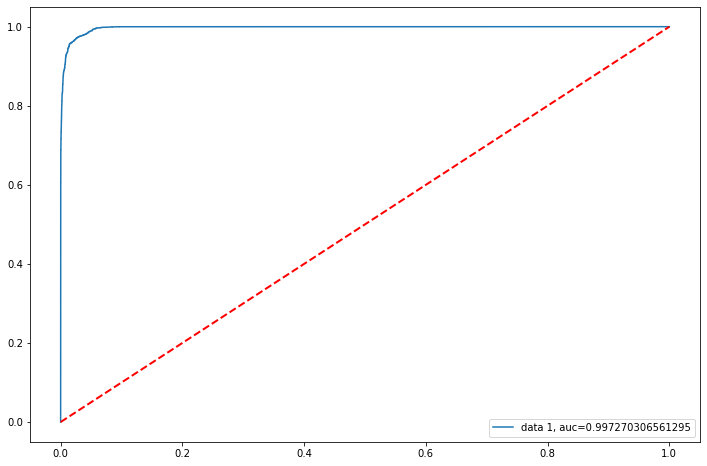

In [90]:
y_pred_proba =  rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

### 5.0 Análise das métricas

In [93]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

LogisticRegression
****Resultados****
Accuracy: 0.9417722516699837
Precision: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9622849711324362
Precision: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943
RandomForestClassifier
****Resultados****
Accuracy: 0.9723738398786183
Precision: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


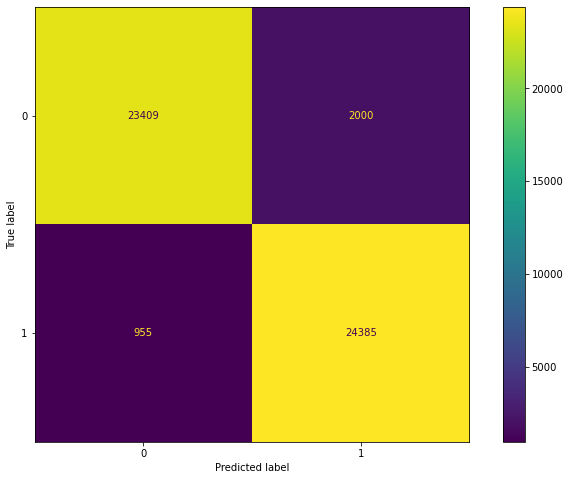

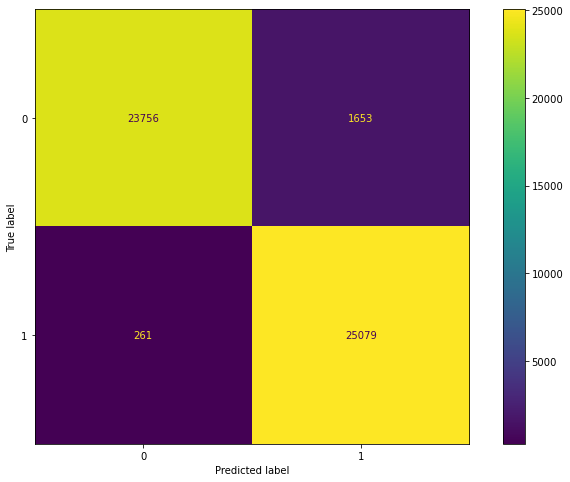

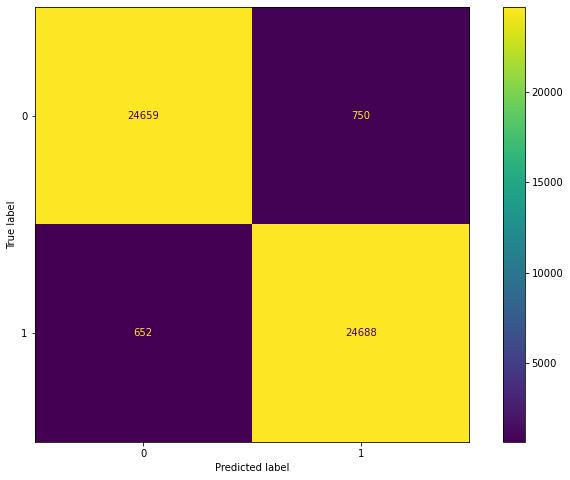

In [94]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1:", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()


### 6.0 Melhorando o modelo

In [113]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [114]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


In [118]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [119]:
SEED

rforest = RandomForestClassifier(random_state=SEED)

In [120]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)


In [121]:
%%time
rcv = random_cv.fit(x, y)

/home/henrique/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/henrique/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/henrique/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

CPU times: user 12.3 s, sys: 222 ms, total: 12.5 s
Wall time: 37 s


In [122]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      22.429066      1.421163         0.354242        0.024118   
1       9.992447      0.167509         0.491439        0.047590   
2       9.856059      0.419470         0.213094        0.016991   
3      18.033645      1.337009         0.465305        0.037947   
4      11.908723      0.185503         0.345340        0.022594   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.991665   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.914223   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.980285   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.993497   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999438           0.992817         0.994640        0.003425   
1           0.936009           0.862704         0.904312        0.030736   
2           1.000000           0.973812         0.984699        0.011138   
3           0.999025           0.992226         0.994916        0.002951   
4           0.943487           0.876537         0.911416        0.027404   

   rank_test_score  
0                2  
1                5  
2                3  
3                1  
4                4

In [123]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

In [124]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

In [125]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9915860411042582
Precisão: 0.9906258615936036
Recall: 0.9925414364640884
F1: 0.9915827238857459


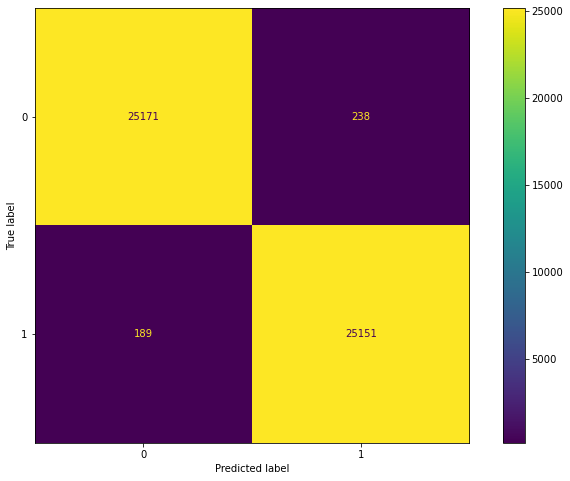

In [126]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()